In [1]:
from google.colab import files
uploaded = files.upload()   # select big_demo_dataset.csv


Saving big_demo_dataset.csv to big_demo_dataset.csv


In [3]:
import pandas as pd

df = pd.read_csv('big_demo_dataset.csv')
df.head()


,vibration,sound,label
0,127,178,normal
1,118,198,normal
2,130,210,normal
3,143,211,normal
4,116,201,normal


In [4]:
X = df[['vibration', 'sound']]   # features
y = df['label']                  # labels


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% test, 80% train
    random_state=42,
    stratify=y          # keep class balance
)


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


In [7]:
svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=10, gamma='scale'))  # RBF kernel SVM
])


In [8]:
svm_model.fit(X_train, y_train)
print("Training done!")


Training done!


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svm_model.predict(X_test)

print("Classification report:\n")
print(classification_report(y_test, y_pred))

print("Confusion matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification report:

              precision    recall  f1-score   support

    critical       1.00      1.00      1.00        50
      normal       1.00      1.00      1.00        80
     warning       1.00      1.00      1.00        70

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion matrix:

[[50  0  0]
 [ 0 80  0]
 [ 0  0 70]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


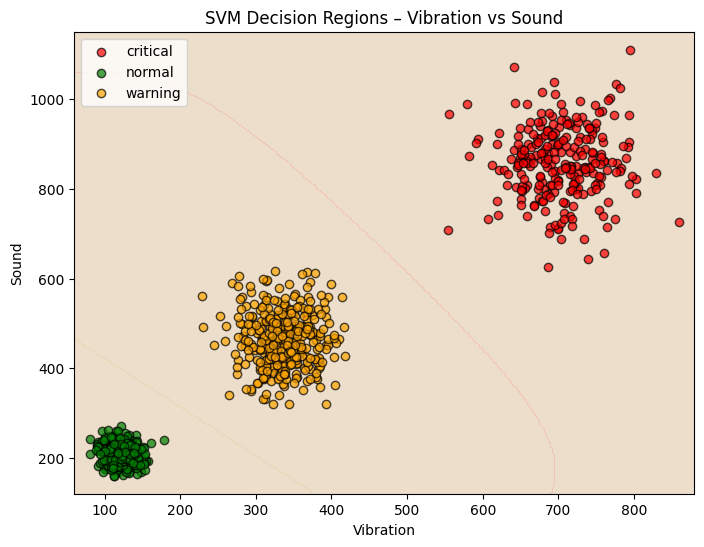

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Take the trained scaler and SVC from the pipeline
scaler = svm_model.named_steps['scaler']
svc = svm_model.named_steps['svc']

# Create a mesh grid over feature space
x_min, x_max = X['vibration'].min() - 20, X['vibration'].max() + 20
y_min, y_max = X['sound'].min() - 40, X['sound'].max() + 40

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Prepare grid points for prediction
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)
Z = svc.predict(grid_points_scaled)
Z = Z.reshape(xx.shape)

# Map labels to colors
label_to_color = {'normal': 'lightgreen', 'warning': 'moccasin', 'critical': 'lightcoral'}
point_colors = {'normal': 'green', 'warning': 'orange', 'critical': 'red'}

# Plot decision regions
plt.figure(figsize=(8,6))
for label, color in label_to_color.items():
    plt.contourf(xx, yy, Z == label, alpha=0.2, colors=[color])

# Plot actual data points
for label, grp in df.groupby('label'):
    plt.scatter(grp['vibration'], grp['sound'],
                label=label, c=point_colors[label], edgecolor='k', alpha=0.7)

plt.xlabel("Vibration")
plt.ylabel("Sound")
plt.title("SVM Decision Regions – Vibration vs Sound")
plt.legend()
plt.show()
